<a target="_blank" href="https://colab.research.google.com/github/RUTIK675LT/DM_assignment_5/blob/main/Video%20Data/video_dataset.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

<a target="_blank" href="https://medium.com/@rutikrasik.darda/data-mining-a-video-data-with-chat-gpt-4-0245c4beea8f">Open in Medium Article</a>

**EDA -**

In [1]:
import cv2
import matplotlib.pyplot as plt

# Load the video
video_path = "/content/video.mp4"
video_capture = cv2.VideoCapture(video_path)

# Extract basic video details
frame_count = int(video_capture.get(cv2.CAP_PROP_FRAME_COUNT))
frame_width = int(video_capture.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(video_capture.get(cv2.CAP_PROP_FRAME_HEIGHT))
frame_rate = int(video_capture.get(cv2.CAP_PROP_FPS))
video_duration = frame_count / frame_rate

# Display a few sample frames
sample_frames = []
timestamps = [0, int(frame_count * 0.25), int(frame_count * 0.5), int(frame_count * 0.75), frame_count - 1]

for timestamp in timestamps:
    video_capture.set(cv2.CAP_PROP_POS_FRAMES, timestamp)
    ret, frame = video_capture.read()
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    sample_frames.append(frame)

video_capture.release()

frame_count, frame_width, frame_height, frame_rate, video_duration, sample_frames


(418,
 640,
 320,
 23,
 18.17391304347826,
 [array([[[254, 255, 167],
          [254, 255, 167],
          [254, 255, 167],
          ...,
          [254, 255, 167],
          [254, 255, 167],
          [254, 255, 167]],
  
         [[254, 255, 167],
          [254, 255, 167],
          [254, 255, 167],
          ...,
          [254, 255, 167],
          [254, 255, 167],
          [254, 255, 167]],
  
         [[254, 255, 167],
          [254, 255, 167],
          [254, 255, 167],
          ...,
          [254, 255, 167],
          [254, 255, 167],
          [254, 255, 167]],
  
         ...,
  
         [[ 67,  76,  46],
          [ 67,  76,  46],
          [ 67,  76,  46],
          ...,
          [ 61,  71,  38],
          [ 62,  72,  39],
          [ 62,  72,  39]],
  
         [[ 72,  81,  51],
          [ 72,  81,  51],
          [ 72,  81,  51],
          ...,
          [ 62,  72,  39],
          [ 64,  74,  41],
          [ 64,  74,  41]],
  
         [[ 75,  84,  54],
        

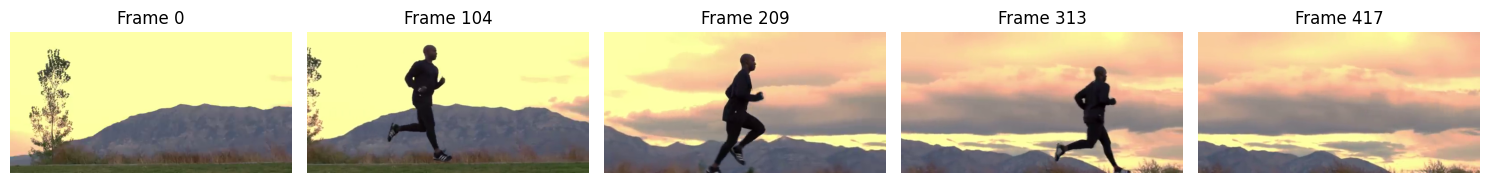

In [2]:
# Display the sample frames
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
for ax, frame, timestamp in zip(axes, sample_frames, timestamps):
    ax.imshow(frame)
    ax.set_title(f"Frame {timestamp}")
    ax.axis("off")
plt.tight_layout()
plt.show()


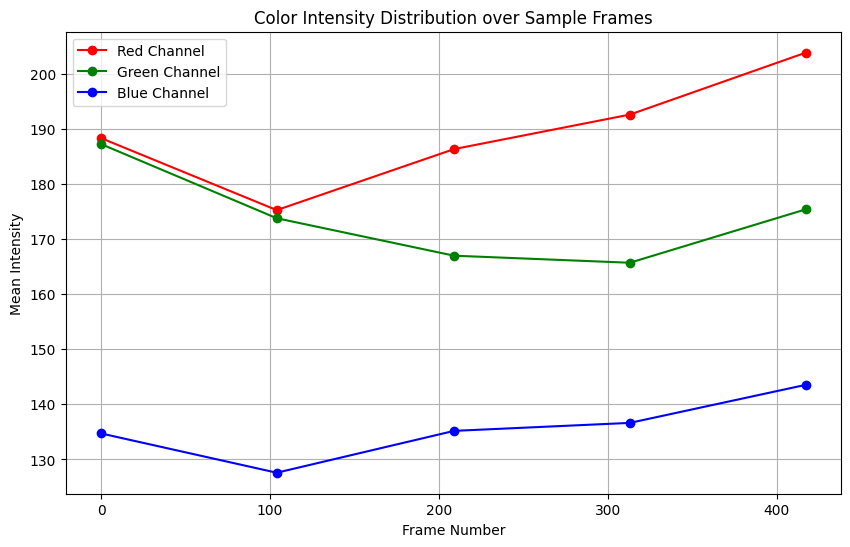

In [3]:
import numpy as np

# Extract RGB values from the sample frames
red_values = [np.mean(frame[:, :, 0]) for frame in sample_frames]
green_values = [np.mean(frame[:, :, 1]) for frame in sample_frames]
blue_values = [np.mean(frame[:, :, 2]) for frame in sample_frames]

# Plot RGB values
plt.figure(figsize=(10, 6))
plt.plot(timestamps, red_values, 'r', label='Red Channel', marker='o')
plt.plot(timestamps, green_values, 'g', label='Green Channel', marker='o')
plt.plot(timestamps, blue_values, 'b', label='Blue Channel', marker='o')
plt.xlabel('Frame Number')
plt.ylabel('Mean Intensity')
plt.title('Color Intensity Distribution over Sample Frames')
plt.legend()
plt.grid(True)
plt.show()


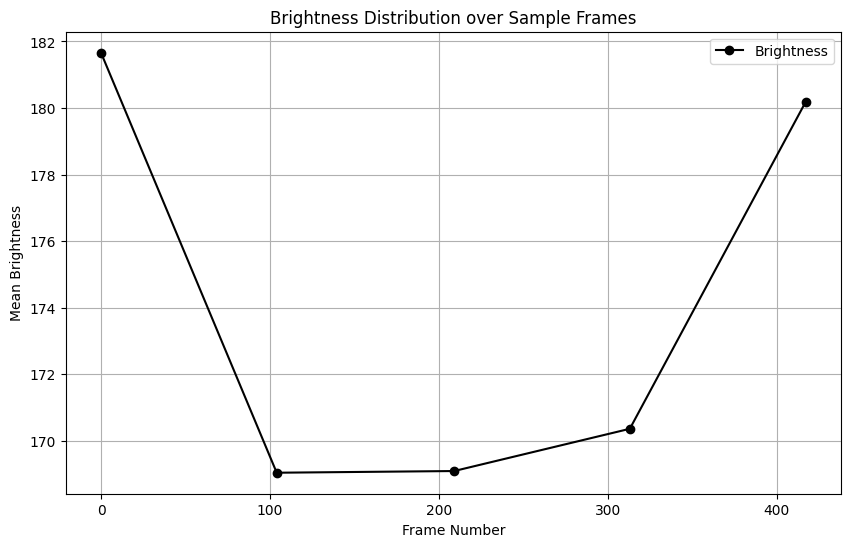

In [4]:
# Compute brightness (mean intensity in grayscale) for the sample frames
brightness_values = [np.mean(cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)) for frame in sample_frames]

# Plot brightness values
plt.figure(figsize=(10, 6))
plt.plot(timestamps, brightness_values, 'k', label='Brightness', marker='o')
plt.xlabel('Frame Number')
plt.ylabel('Mean Brightness')
plt.title('Brightness Distribution over Sample Frames')
plt.legend()
plt.grid(True)
plt.show()


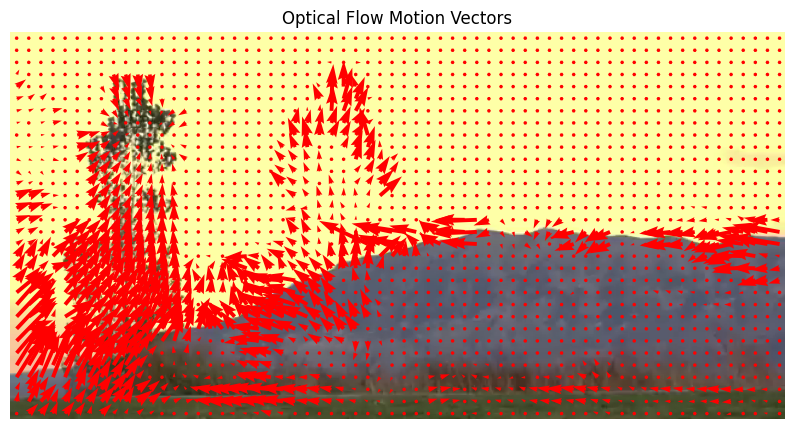

In [5]:
# Convert the first two sample frames to grayscale
gray_frame1 = cv2.cvtColor(sample_frames[0], cv2.COLOR_RGB2GRAY)
gray_frame2 = cv2.cvtColor(sample_frames[1], cv2.COLOR_RGB2GRAY)

# Compute dense optical flow using Farneback method
flow = cv2.calcOpticalFlowFarneback(gray_frame1, gray_frame2, None, 0.5, 3, 15, 3, 5, 1.2, 0)

# Visualize optical flow (sample a subset for clarity)
step_size = 10
Y, X = np.mgrid[step_size/2:frame_height:step_size, step_size/2:frame_width:step_size].reshape(2, -1).astype(int)
U, V = flow[Y, X].T

# Display the original frame with motion vectors
plt.figure(figsize=(10, 6))
plt.imshow(sample_frames[0])
plt.quiver(X, Y, U, V, angles='xy', scale_units='xy', scale=1, color='red', width=0.005)
plt.title('Optical Flow Motion Vectors')
plt.axis('off')
plt.show()


In [6]:
# Compute the dominant motion direction based on the mean of vector orientations
mean_direction = np.arctan2(np.mean(V), np.mean(U)) * 180 / np.pi

# Define a heuristic to recognize the action
action = "unknown"
if 45 < mean_direction <= 135:
    action = "running upwards"
elif -45 > mean_direction >= -135:
    action = "running downwards"
elif mean_direction <= 45 and mean_direction >= -45:
    action = "running to the right"
else:
    action = "running to the left"

action


'running downwards'

In [16]:
!pip install opencv-python


In [20]:
# Install OpenCV
!pip install opencv-python

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the video (replace with your path or use the uploaded file path in Colab)
video_path = '/content/video.mp4'  # replace 'YOUR_VIDEO_PATH_HERE' with the path to your video
video_capture = cv2.VideoCapture(video_path)

# Extract basic video details
frame_count = int(video_capture.get(cv2.CAP_PROP_FRAME_COUNT))
frame_width = int(video_capture.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(video_capture.get(cv2.CAP_PROP_FRAME_HEIGHT))
frame_rate = int(video_capture.get(cv2.CAP_PROP_FPS))

# Extract a subset of frames from the video for visualization
frames_subset = []
num_frames_to_extract = 5
skip_frames = frame_count // num_frames_to_extract
for i in range(num_frames_to_extract):
    video_capture.set(cv2.CAP_PROP_POS_FRAMES, i * skip_frames)
    ret, frame = video_capture.read()
    frames_subset.append(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
video_capture.release()

# Compute optical flow between consecutive frames in the subset
flows = []
for i in range(len(frames_subset) - 1):
    gray_frame1 = cv2.cvtColor(frames_subset[i], cv2.COLOR_RGB2GRAY)
    gray_frame2 = cv2.cvtColor(frames_subset[i + 1], cv2.COLOR_RGB2GRAY)
    flow = cv2.calcOpticalFlowFarneback(gray_frame1, gray_frame2, None, 0.5, 3, 15, 3, 5, 1.2, 0)
    flows.append(flow)

# Overlay action prediction and motion vectors on the frames
annotated_frames = []
step_size = 10
for i, frame in enumerate(frames_subset[:-1]):
    # Action prediction based on mean direction
    mean_direction = np.arctan2(np.mean(flows[i][:, :, 1]), np.mean(flows[i][:, :, 0])) * 180 / np.pi
    action_text = "unknown"
    if 45 < mean_direction <= 135:
        action_text = "running upwards"
    elif -45 > mean_direction >= -135:
        action_text = "running downwards"
    elif mean_direction <= 45 and mean_direction >= -45:
        action_text = "running to the right"
    else:
        action_text = "running to the left"

    # Overlay action and motion vectors
    overlay_frame = frame.copy()
    cv2.putText(overlay_frame, action_text, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2, cv2.LINE_AA)
    Y, X = np.mgrid[step_size/2:frame_height:step_size, step_size/2:frame_width:step_size].reshape(2, -1).astype(int)
    U, V = flows[i][Y, X].T
    for x, y, u, v in zip(X, Y, U, V):
        cv2.arrowedLine(overlay_frame, (x, y), (x + int(u), y + int(v)), (255, 0, 0), 1, tipLength=0.3)
    annotated_frames.append(overlay_frame)

# Once you've executed the above, 'annotated_frames' will be available and defined


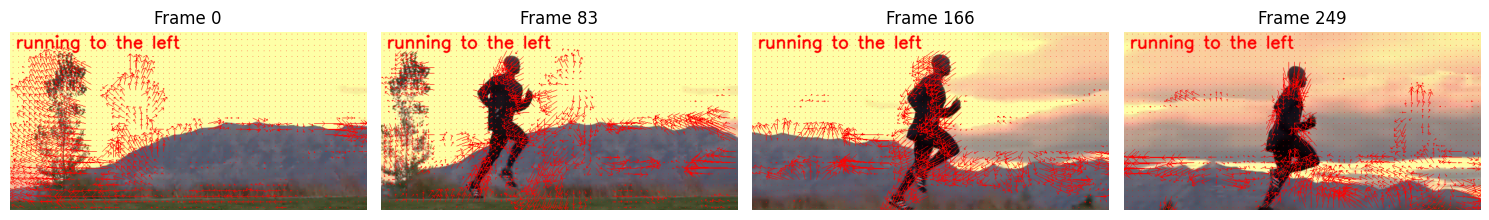

In [21]:
# Display the annotated frames with action predictions and motion vectors
fig, axes = plt.subplots(1, len(annotated_frames), figsize=(15, 5))
for ax, annotated_frame, index in zip(axes, annotated_frames, range(len(annotated_frames))):
    ax.imshow(annotated_frame)
    ax.set_title(f"Frame {index * skip_frames}")
    ax.axis("off")
plt.tight_layout()
plt.show()


**Clustering -**

In [22]:
!pip install opencv-python-headless scikit-learn


In [23]:
import cv2
import numpy as np

# Load the video
video_path = '/content/video.mp4'  # Replace with your video path if different
video_capture = cv2.VideoCapture(video_path)

frame_features = []
while True:
    ret, frame = video_capture.read()
    if not ret:
        break

    # Resize the frame to a smaller resolution (e.g., 64x64)
    small_frame = cv2.resize(frame, (64, 64))

    # Convert the 2D frame to a 1D vector and store
    frame_features.append(small_frame.flatten())

video_capture.release()
frame_features = np.array(frame_features)


In [24]:
from sklearn.cluster import KMeans

# Define the number of clusters you want (this can be adjusted based on your video content)
num_clusters = 3  # For example purposes, adjust if needed

# Perform KMeans clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=0).fit(frame_features)

# Get the cluster labels for each frame
cluster_labels = kmeans.labels_


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


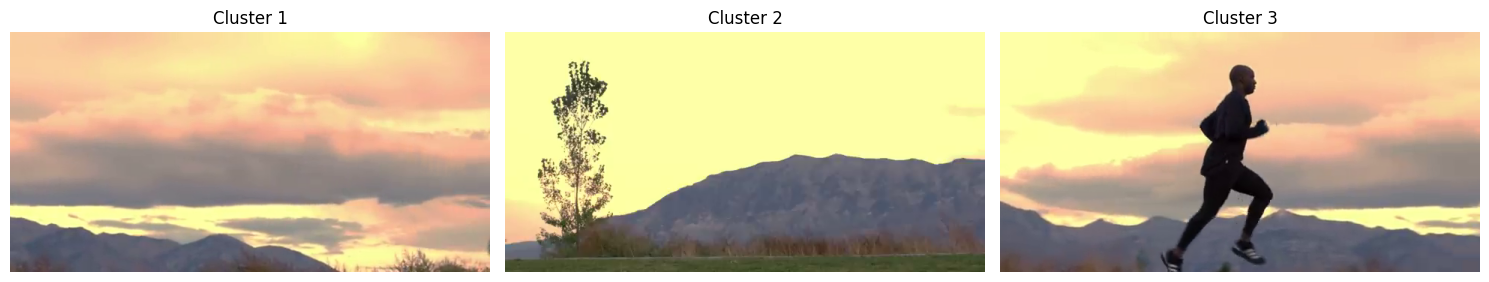

In [25]:
import matplotlib.pyplot as plt

# Load the video again for visualization
video_capture = cv2.VideoCapture(video_path)
all_frames = []
while True:
    ret, frame = video_capture.read()
    if not ret:
        break
    all_frames.append(frame)
video_capture.release()

# For each cluster, find the frame closest to the centroid
representative_frames = []
for cluster_id in range(num_clusters):
    distances = np.linalg.norm(frame_features - kmeans.cluster_centers_[cluster_id], axis=1)
    closest_frame_idx = np.argmin(distances)
    representative_frames.append(all_frames[closest_frame_idx])

# Display the representative frames
fig, axes = plt.subplots(1, num_clusters, figsize=(15, 5))
for ax, rep_frame, cluster_id in zip(axes, representative_frames, range(num_clusters)):
    ax.imshow(cv2.cvtColor(rep_frame, cv2.COLOR_BGR2RGB))
    ax.set_title(f"Cluster {cluster_id + 1}")
    ax.axis("off")
plt.tight_layout()
plt.show()


**Model -**

In [29]:
import cv2
import numpy as np
import pandas as pd

# Load the video
video_path = 'video.mp4'
video_capture = cv2.VideoCapture(video_path)

frame_features = []
while True:
    ret, frame = video_capture.read()
    if not ret:
        break

    # Resize the frame to a smaller resolution (e.g., 64x64)
    small_frame = cv2.resize(frame, (64, 64))

    # Convert the 2D frame to a 1D vector and store
    frame_features.append(small_frame.flatten())

video_capture.release()
frame_features = np.array(frame_features)

# Convert to a pandas DataFrame
df = pd.DataFrame(frame_features)



In [32]:
from pycaret.clustering import *
clustering_setup = setup(data=df, session_id=123)


,Description,Value
0,Session id,123
1,Original data shape,"(418, 12288)"
2,Transformed data shape,"(418, 12288)"
3,Numeric features,12288
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


In [33]:
# Train a KMeans model
kmeans_model = create_model('kmeans', num_clusters=3)


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3048,146.6952,1.4754,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [34]:
# Save the trained model to disk
save_model(kmeans_model, 'kmeans_model_for_video')


Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['0', '1', '2', '3', '4', '5', '6',
                                              '7', '8', '9', '10', '11', '12',
                                              '13', '14', '15', '16', '17', '18',
                                              '19', '20', '21', '22', '23', '24',
                                              '25', '26', '27', '28', '29', ...],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('trained_model', KMeans(n_clusters=3, random_state=123))]),
 'kmeans_model_for_video.pkl')